In [1]:
! pwd

/kaggle/working


In [2]:
import os 
import glob
main_path = '../input/labeled-chest-xray-images/chest_xray/'
train_path = os.path.join(main_path, 'train')
test_path = os.path.join(main_path, 'test')
train_normal = glob.glob(train_path+'/NORMAL/*.jpeg')
train_pneumonia = glob.glob(train_path+'/PNEUMONIA/*.jpeg')
test_normal = glob.glob(test_path+'/NORMAL/*.jpeg')
test_pneumonia = glob.glob(test_path+'/PNEUMONIA/*.jpeg')

In [3]:
# print(train_pneumonia)
# print(train_normal)

In [4]:
import pandas as pd
import numpy as np 
train_list = [x for x in train_normal]
train_list.extend(train_pneumonia)

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal), 
                                       ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]
df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal), 
                                       ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
test_list = [x for x in test_normal]
test_list.extend(test_pneumonia)
df_test['image'] = [x for x in test_list]

In [5]:
df_train

,class,image
0,Normal,../input/labeled-chest-xray-images/chest_xray/...
1,Normal,../input/labeled-chest-xray-images/chest_xray/...
2,Normal,../input/labeled-chest-xray-images/chest_xray/...
3,Normal,../input/labeled-chest-xray-images/chest_xray/...
4,Normal,../input/labeled-chest-xray-images/chest_xray/...
...,...,...
5227,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
5228,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
5229,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
5230,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...


In [7]:
df_test

,class,image
0,Normal,../input/labeled-chest-xray-images/chest_xray/...
1,Normal,../input/labeled-chest-xray-images/chest_xray/...
2,Normal,../input/labeled-chest-xray-images/chest_xray/...
3,Normal,../input/labeled-chest-xray-images/chest_xray/...
4,Normal,../input/labeled-chest-xray-images/chest_xray/...
...,...,...
619,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
620,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
621,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...
622,Pneumonia,../input/labeled-chest-xray-images/chest_xray/...


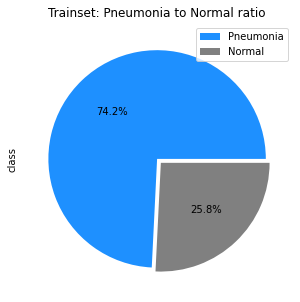

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,5))
df_train['class'].value_counts().plot(kind='pie', explode=[0, 0.05], labels=['',''], colors=['dodgerblue','grey'], autopct='%.1f%%')
plt.legend(labels=['Pneumonia', 'Normal'])
_ = plt.title('Trainset: Pneumonia to Normal ratio')

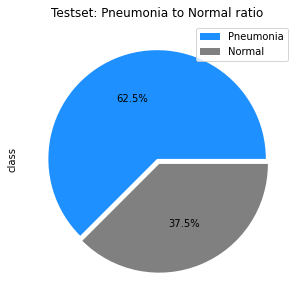

In [9]:
plt.figure(figsize =(10,5))
df_test['class'].value_counts().plot(kind='pie', explode=[0, 0.05], labels=['',''], colors=['dodgerblue','grey'], autopct='%.1f%%')
plt.legend(labels=['Pneumonia', 'Normal'])
_ = plt.title('Testset: Pneumonia to Normal ratio')

Train Set - Normal


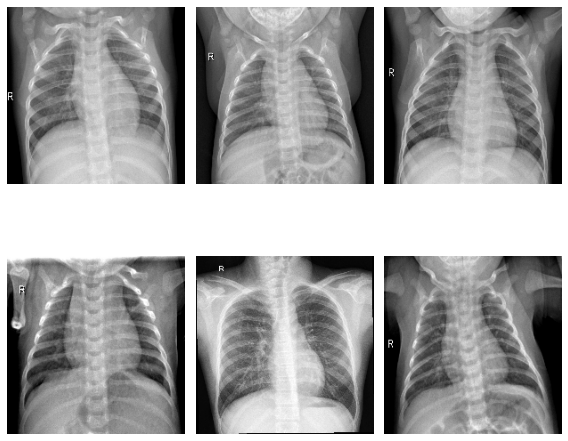

In [10]:
import cv2
print('Train Set - Normal')
plt.figure(figsize=(8,8))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = cv2.imread(train_normal[i])
  img = cv2.resize(img, (200,200))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()

Train Set - Pneumonia


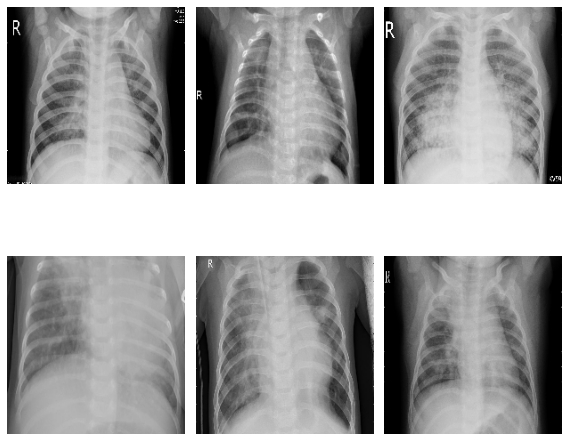

In [11]:
print('Train Set - Pneumonia')
plt.figure(figsize=(8,8))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = cv2.imread(train_pneumonia[i])
  img = cv2.resize(img, (200,200))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()

Test Set - Normal


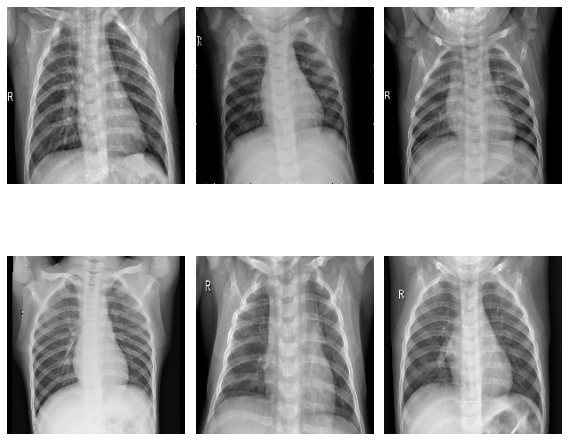

In [12]:
print('Test Set - Normal')
plt.figure(figsize=(8,8))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = cv2.imread(test_normal[i])
  img = cv2.resize(img, (200,200))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()

Test Set - Pneumonia


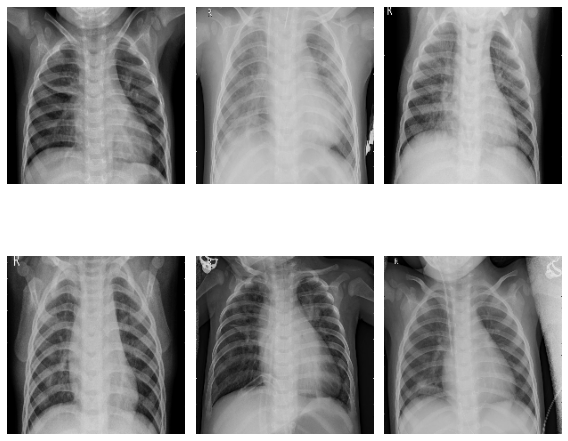

In [13]:
print('Test Set - Pneumonia')
plt.figure(figsize=(8,8))
for i in range(0,6):
  plt.subplot(2, 3, i+1)
  img = cv2.imread(test_pneumonia[i])
  img = cv2.resize(img, (200,200))
  plt.imshow(img)
  plt.axis('off')

plt.tight_layout()

Data preparation for CNN

In [14]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(df_train, test_size = 0.2, random_state = 0, stratify=df_train['class'])

In [15]:
#check if stratified
print(train_df['class'].value_counts(normalize=True))
print(val_df['class'].value_counts(normalize=True))

Pneumonia    0.742174
Normal       0.257826
Name: class, dtype: float64
Pneumonia    0.74212
Normal       0.25788
Name: class, dtype: float64


In [16]:
#data augmentation for train_df and rescaling of pixels for val_df and test_ds
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 32

train_dfgen = ImageDataGenerator(rescale = 1/255., width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
                                 zoom_range = 0.1)
train_ds = train_dfgen.flow_from_dataframe(dataframe=train_df, x_col='image', y_col='class', target_size=(200,200),
                                           class_mode='binary', batch_size=batch_size, seed=0)

val_dfgen = ImageDataGenerator(rescale = 1/255.)
val_ds = val_dfgen.flow_from_dataframe(dataframe=val_df, x_col='image', y_col='class', target_size=(200,200),
                                        class_mode='binary', batch_size=batch_size, seed=0)

test_ds = val_dfgen.flow_from_dataframe(dataframe=df_test, x_col='image', y_col='class', target_size=(200,200),
                                        class_mode='binary', batch_size=1, shuffle=False)

2021-09-30 11:17:24.136788: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# CNN model

In [52]:
#setting callbacks/regularization
from tensorflow.keras import callbacks
early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.0000001,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.1,                                     
    patience = 2,                                   
    min_delt = 0.0000001,                                
    cooldown = 0,                               
    verbose = 1
) 

In [53]:
def get_model():
  #input layer
  i = Input(shape=(200,200, 3))
  #block 1
  x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
  x = BatchNormalization()(x)
  x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  #block 2
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  #block 3
  x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
  x = BatchNormalization()(x)
  x = MaxPooling2D((2, 2))(x)
  # fully connected layer
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(256, activation='relu')(x)
  #Output layer
  x = Dense(1, activation='sigmoid')(x)
  model = Model(i, x)
  return model

In [54]:
model = get_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])
 
r = model.fit(train_ds, batch_size=batch_size, epochs=50, validation_data=val_ds,
              steps_per_epoch=len(train_df)//batch_size, validation_steps=len(val_df)//batch_size,
              callbacks=[early_stop, plateau])

Epoch 1/50
130/130 [==============================] - 82s 627ms/step - loss: 2.2547 - binary_accuracy: 0.8022 - val_loss: 16.2114 - val_binary_accuracy: 0.7402
Epoch 2/50
130/130 [==============================] - 83s 639ms/step - loss: 0.5461 - binary_accuracy: 0.8905 - val_loss: 14.8097 - val_binary_accuracy: 0.7402
Epoch 3/50
130/130 [==============================] - 81s 625ms/step - loss: 0.3449 - binary_accuracy: 0.9060 - val_loss: 0.3924 - val_binary_accuracy: 0.8438
Epoch 4/50
130/130 [==============================] - 82s 627ms/step - loss: 0.2700 - binary_accuracy: 0.9267 - val_loss: 0.3323 - val_binary_accuracy: 0.8467
Epoch 5/50
130/130 [==============================] - 81s 620ms/step - loss: 0.2140 - binary_accuracy: 0.9268 - val_loss: 2.1323 - val_binary_accuracy: 0.4004
Epoch 6/50
130/130 [==============================] - 82s 633ms/step - loss: 0.1834 - binary_accuracy: 0.9328 - val_loss: 0.3157 - val_binary_accuracy: 0.8906
Epoch 7/50
130/130 [========================

In [55]:
r.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy', 'lr'])

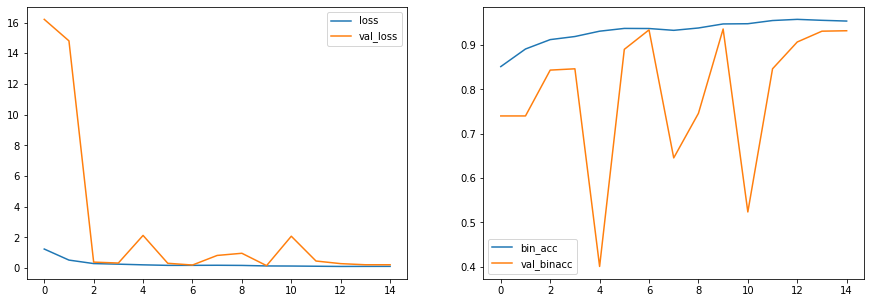

In [56]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(r.history['loss'], label='loss')
ax.plot(r.history['val_loss'], label='val_loss')
ax.legend()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(r.history['binary_accuracy'], label='bin_acc')
ax2.plot(r.history['val_binary_accuracy'], label='val_binacc')
_ = ax2.legend()

In [57]:
score = model.evaluate(val_ds, steps=len(val_df)//batch_size)
print("Val loss: ", score[0])
print("Val binary accuracy: ", score[1])

32/32 [==============================] - 10s 315ms/step - loss: 0.1476 - binary_accuracy: 0.9404
Val loss:  0.1476183384656906
Val binary accuracy:  0.9404296875


In [58]:
test_ds.reset()
score = model.evaluate(test_ds, steps=len(df_test)//batch_size)
print("Test loss: ", score[0])
print("Test binary accuracy: ", score[1])

19/19 [==============================] - 0s 23ms/step - loss: 0.3948 - binary_accuracy: 0.8421
Test loss:  0.3947608768939972
Test binary accuracy:  0.8421052694320679


In [59]:
# model.save('xray.h5')

In [18]:
#load trained model
import tensorflow as tf
model = tf.keras.models.load_model('../input/xrayh5/xray.h5')
model.summary()

2021-09-30 11:18:07.936316: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-09-30 11:18:07.939179: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-09-30 11:18:07.977660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-30 11:18:07.978260: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-09-30 11:18:07.978324: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-09-30 11:18:08.004106: I tensorflow/stream_executor/platform/def

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
batch_normalization_12 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
batch_normalization_13 (Batc (None, 200, 200, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 64)      1849

In [20]:
# using steps for model.evaluate does not cover all test samples and may jeopardize accuracy
print(model.evaluate(test_ds, steps=len(df_test)//batch_size))
print(model.evaluate(test_ds))

19/19 [==============================] - 0s 19ms/step - loss: 0.3948 - binary_accuracy: 0.8421
[0.3947608768939972, 0.8421052694320679]
624/624 [==============================] - 7s 11ms/step - loss: 0.2796 - binary_accuracy: 0.8814
[0.279572993516922, 0.8814102411270142]


## Model Prediction

In [21]:
# {Normal: 0, Pneumonia: 1}
y_test = df_test['class'].map(test_ds.class_indices)
y_test

0      0
1      0
2      0
3      0
4      0
      ..
619    1
620    1
621    1
622    1
623    1
Name: class, Length: 624, dtype: int64

In [22]:
test_ds.reset()
yhat = model.predict(test_ds)
yhat = np.where(yhat>0.5, 1, 0)

In [23]:
from sklearn.metrics import accuracy_score
print(f'Accuracy score: {accuracy_score(y_test, yhat)}')

Accuracy score: 0.8814102564102564


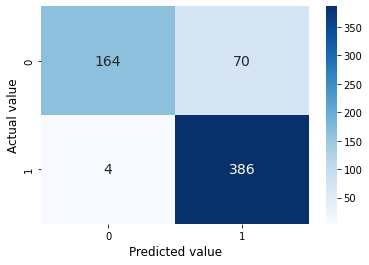

In [24]:
# {Normal: 0, Pneumonia: 1}
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yhat)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 14})
plt.xlabel('Predicted value', fontsize = 12)
_ = plt.ylabel('Actual value', fontsize = 12)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.98      0.70      0.82       234
   Pneumonia       0.85      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.85      0.86       624
weighted avg       0.90      0.88      0.88       624



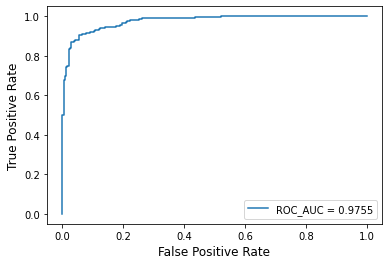

In [37]:
from sklearn import metrics
yprob = model.predict(test_ds)
roc_auc = metrics.roc_auc_score(y_test, yprob)

fpr, tpr, thresholds = metrics.roc_curve(y_test, yprob)

plt.plot(fpr, tpr, label = f'ROC_AUC = {roc_auc:.4f}')
plt.xlabel("False Positive Rate", fontsize= 12)
plt.ylabel("True Positive Rate", fontsize= 12)
plt.legend();

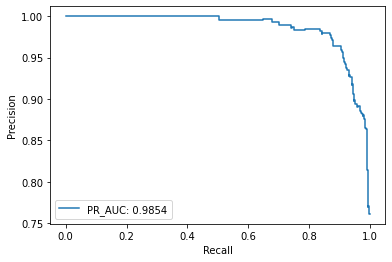

In [38]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay, auc, average_precision_score)
precision, recall, _ = precision_recall_curve(y_test, yprob)
pr_auc = auc(recall, precision)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
_ = disp.plot(label=f'PR_AUC: {pr_auc:.4f}')

[  1  12  18  21  30  32  46  47  49  56  57  60  68  72  75  77  82  87
  89  93  95 103 108 110 114 117 120 123 126 129 135 137 139 144 146 148
 149 150 151 155 157 158 159 160 161 167 169 170 172 174 177 178 180 182
 183 184 185 188 189 190 191 202 204 208 209 210 220 224 228 230 344 380
 467 552]
380


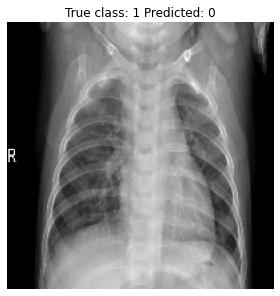

In [104]:
misclassified_i = np.where(np.array(y_test) != yhat.flatten())[0]
i = np.random.choice(misclassified_i)
img = cv2.imread(test_list[i])
img = cv2.resize(img, (200,200))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
_ = plt.title(f"True class: {y_test[i]} Predicted: {yhat.flatten()[i]}")
print(misclassified_i)
print(i)

[  1  12  18  21  30  32  46  47  49  56  57  60  68  72  75  77  82  87
  89  93  95 103 108 110 114 117 120 123 126 129 135 137 139 144 146 148
 149 150 151 155 157 158 159 160 161 167 169 170 172 174 177 178 180 182
 183 184 185 188 189 190 191 202 204 208 209 210 220 224 228 230 344 380
 467 552]
103


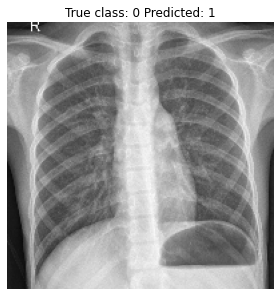

In [105]:
misclassified_i = np.where(np.array(y_test) != yhat.flatten())[0]
i = np.random.choice(misclassified_i)
img = cv2.imread(test_list[i])
img = cv2.resize(img, (200,200))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
_ = plt.title(f"True class: {y_test[i]} Predicted: {yhat.flatten()[i]}")
print(misclassified_i)
print(i)

[  1  12  18  21  30  32  46  47  49  56  57  60  68  72  75  77  82  87
  89  93  95 103 108 110 114 117 120 123 126 129 135 137 139 144 146 148
 149 150 151 155 157 158 159 160 161 167 169 170 172 174 177 178 180 182
 183 184 185 188 189 190 191 202 204 208 209 210 220 224 228 230 344 380
 467 552]
180


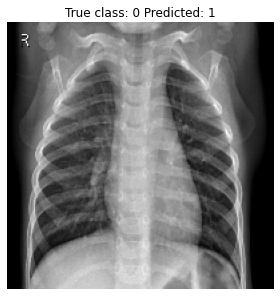

In [106]:
misclassified_i = np.where(np.array(y_test) != yhat.flatten())[0]
i = np.random.choice(misclassified_i)
img = cv2.imread(test_list[i])
img = cv2.resize(img, (200,200))
plt.imshow(img)
plt.axis('off')
plt.tight_layout()
_ = plt.title(f"True class: {y_test[i]} Predicted: {yhat.flatten()[i]}")
print(misclassified_i)
print(i)